**VOIS-AICTE Internship**

---


# *AIRBNB HOTEL BOOKING ANALYSIS*




##**Importing Required Libraries**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Data**

In [127]:
df=pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv")

/tmp/ipython-input-1417618599.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv")


In [128]:
# First 5 rows of Dataset(all columns)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [129]:
# Last 5 rows of Dataset(all columns)
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,06-07-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,11-10-2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [130]:
# Rows and Columns in DF
df.shape

(102599, 26)

In [131]:
# Total filled cells/values of data
df.size

2667574

## **Data Wrangling**

### *   Data Cleaning
### *   Data Preprocessing
### *   Data Preparation



In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [133]:
# Finding if our data has duplicate values
df.duplicated().value_counts()

,count
False,102058
True,541


In [134]:
# we have 541 duplicate  value we have to remove it
df.drop_duplicates(inplace=True)

In [135]:
# checking again- if duplicates are removed or not
df.duplicated().value_counts()

,count
False,102058


In [136]:
# Now Lets Check Null Values
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [137]:
# The column house_rules and license has more than 50% null values, so lets remove them
df.drop(["house_rules","license"],axis=1,inplace=True)

In [138]:
# removing all $ signs from all service fees and price column
df["service fee"]=df["service fee"].str.replace("$","")
df["price"]=df["price"].str.replace("$","")

In [139]:
# checking if $ sign is removed or not
print(df["service fee"])
print(df["price"])

0         193 
1          28 
2         124 
3          74 
4          41 
          ... 
102053     NaN
102054     NaN
102055     NaN
102056     NaN
102057     NaN
Name: service fee, Length: 102058, dtype: object
0           966 
1           142 
2           620 
3           368 
4           204 
           ...  
102053      696 
102054      909 
102055      387 
102056      848 
102057    1,128 
Name: price, Length: 102058, dtype: object


In [140]:
# Also we need to remove , from price and service fee
df["service fee"]=df["service fee"].str.replace(",","")
df["price"]=df["price"].str.replace(",","")

In [141]:
# Remaining service fee and price columns with service fee_$ and price_$
df.rename(columns={"service fee":"service fee_$","price":"price_$"},inplace=True)

In [142]:
# Checking column names are renamed or not
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [143]:
# Correcting data types of Columns
df["service fee_$"]=df["service fee_$"].astype(float)
df["price_$"]=df["price_$"].astype(float)
df["id"]=df["id"].astype(str)
df["host id"]=df["host id"].astype(str)
df["last review"]=pd.to_datetime(df["last review"])
# Fill NaN values in 'Construction year' with the mean before converting to int
df["Construction year"] = df["Construction year"].fillna(df["Construction year"].mean()).astype(int)

/tmp/ipython-input-2462145944.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last review"]=pd.to_datetime(df["last review"])


In [144]:
# Checking Classes in neighbourhood group
df["neighbourhood group"].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [145]:
# Correcting the spelling of neibourhood group-> brookln to neibourhood group-> Brookyln
df.loc[df["neighbourhood group"]=="brookln","neighbourhood group"]="Brooklyn"

In [146]:
# Checking corrected spelling or not
df["neighbourhood group"].unique()=="brookln"

array([False, False, False, False, False, False, False])

In [147]:
# Checking Classes in host identity vertified
df["host_identity_verified"].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [148]:
# Checking Classes in instant_bookable
df["instant_bookable"].unique()

array([False, True, nan], dtype=object)

In [149]:
# Checking Classes in room type
df["room type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [150]:
# Checking Classes in cancellation_policy
df["cancellation_policy"].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [151]:
# Removing all null values
df.dropna(inplace=True)

In [152]:
# Checking if null values are removed or not
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [153]:
# Defining function for finding outlier's existance

def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

In [154]:
# Finding columns with outliers
find_outliers_iqr(df["minimum nights"])

(0          10.0
 1          30.0
 4          10.0
 7          45.0
 108        30.0
           ...  
 101979     13.0
 101980    180.0
 101997     30.0
 102010     31.0
 102011     30.0
 Name: minimum nights, Length: 13621, dtype: float64,
 np.float64(-2.5),
 np.float64(9.5))

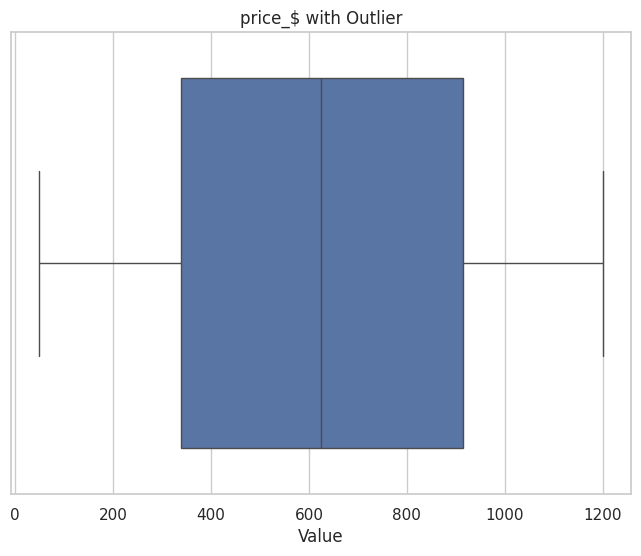

In [155]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price_$"])
plt.title("price_$ with Outlier")
plt.xlabel("Value")
plt.show()

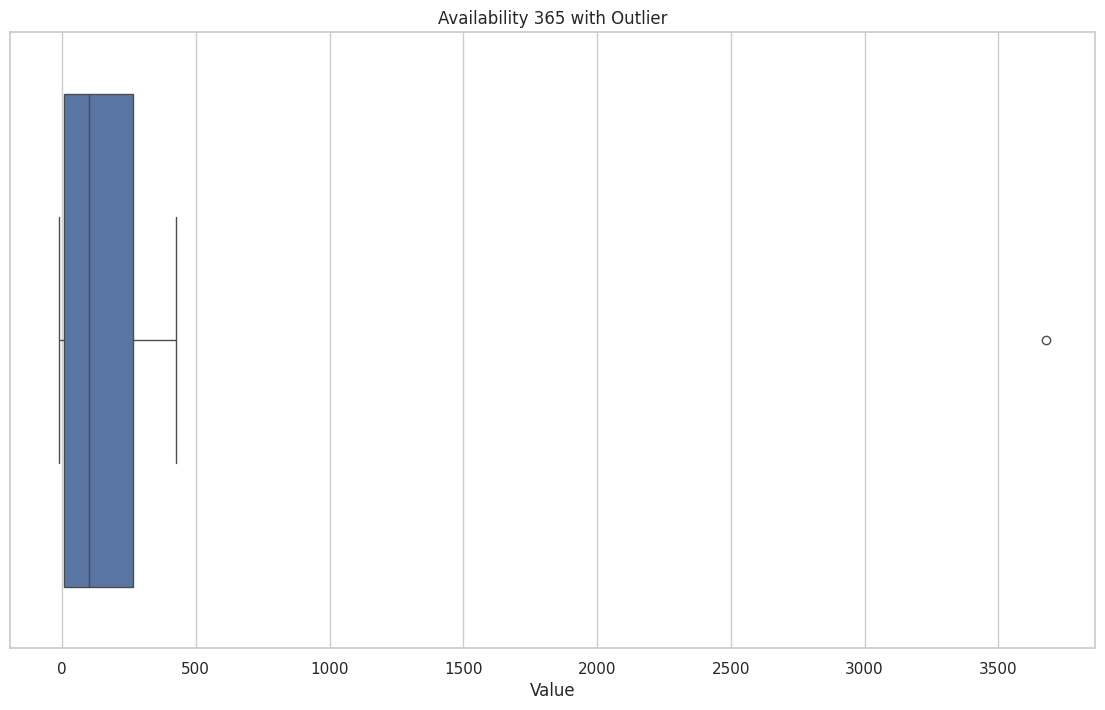

In [156]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["availability 365"])
plt.title("Availability 365 with Outlier")
plt.xlabel("Value")
plt.show()

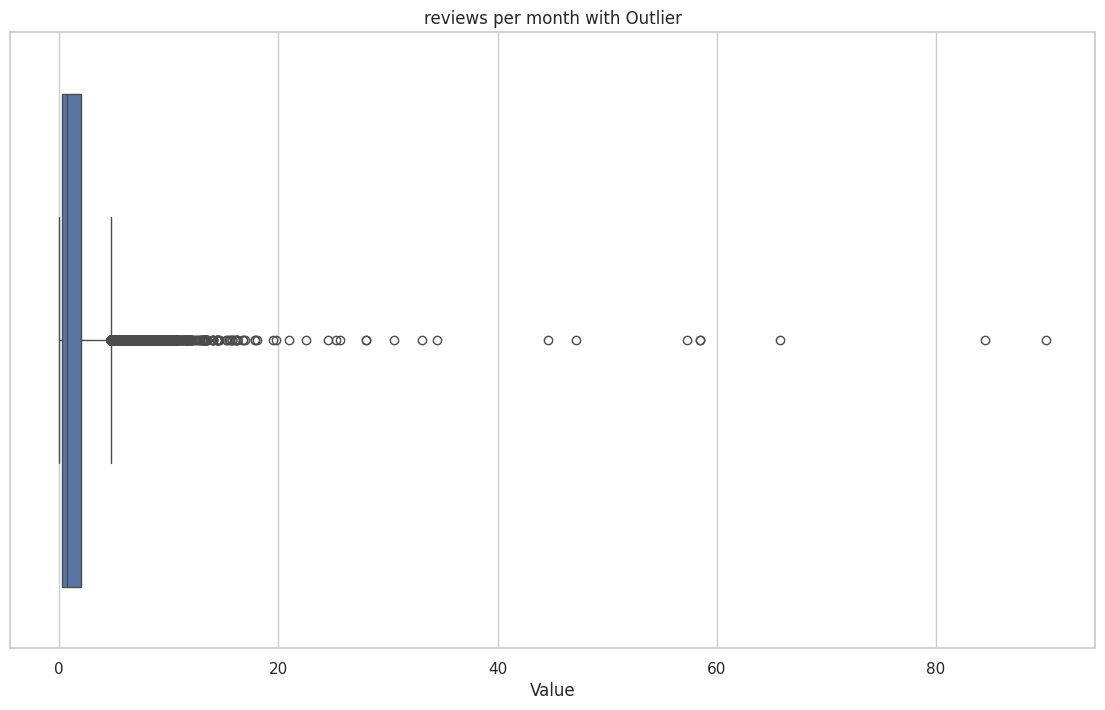

In [157]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["reviews per month"])
plt.title("reviews per month with Outlier")
plt.xlabel("Value")
plt.show()

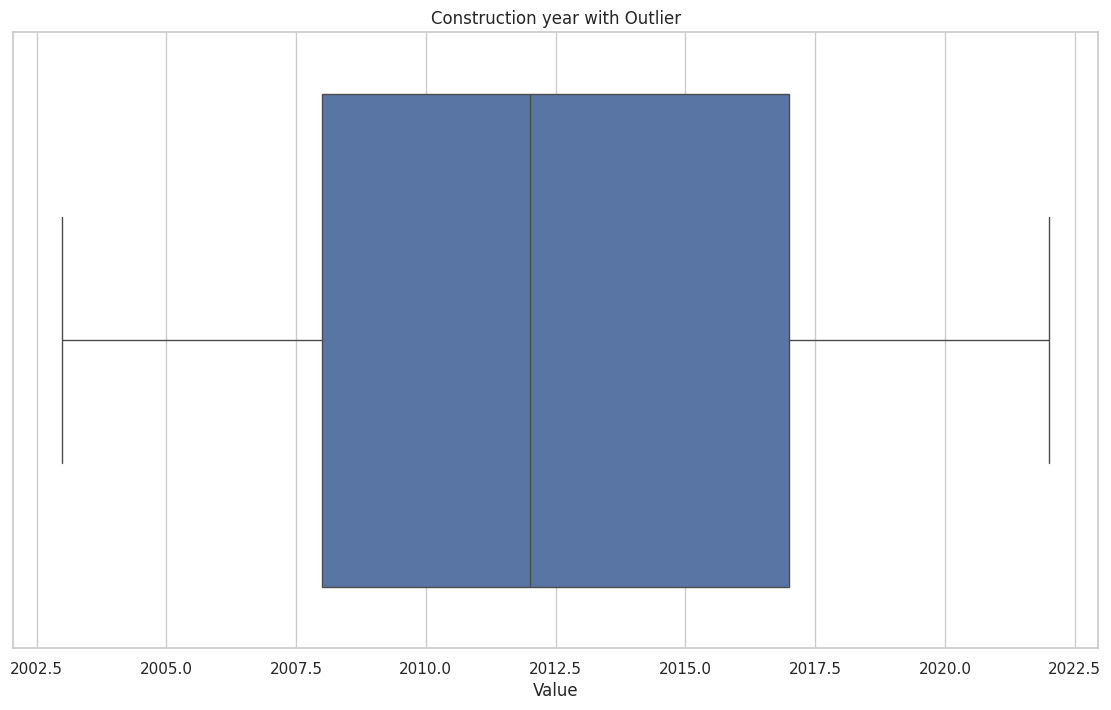

In [158]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["Construction year"])
plt.title("Construction year with Outlier")
plt.xlabel("Value")
plt.show()

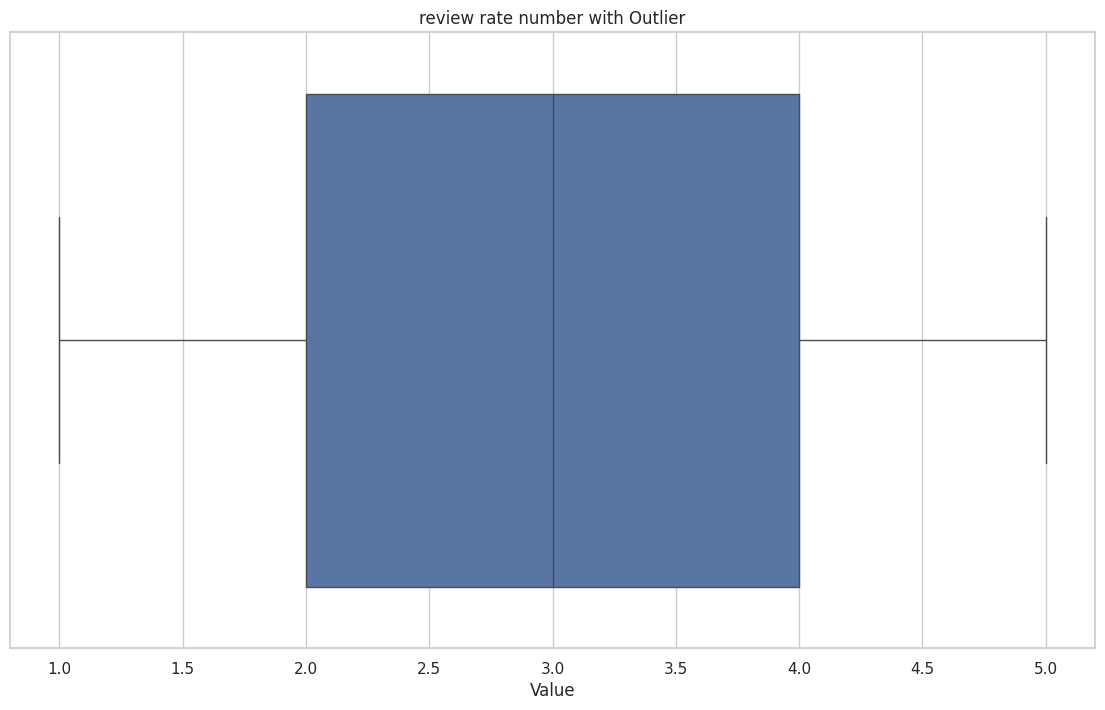

In [159]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["review rate number"])
plt.title("review rate number with Outlier")
plt.xlabel("Value")
plt.show()

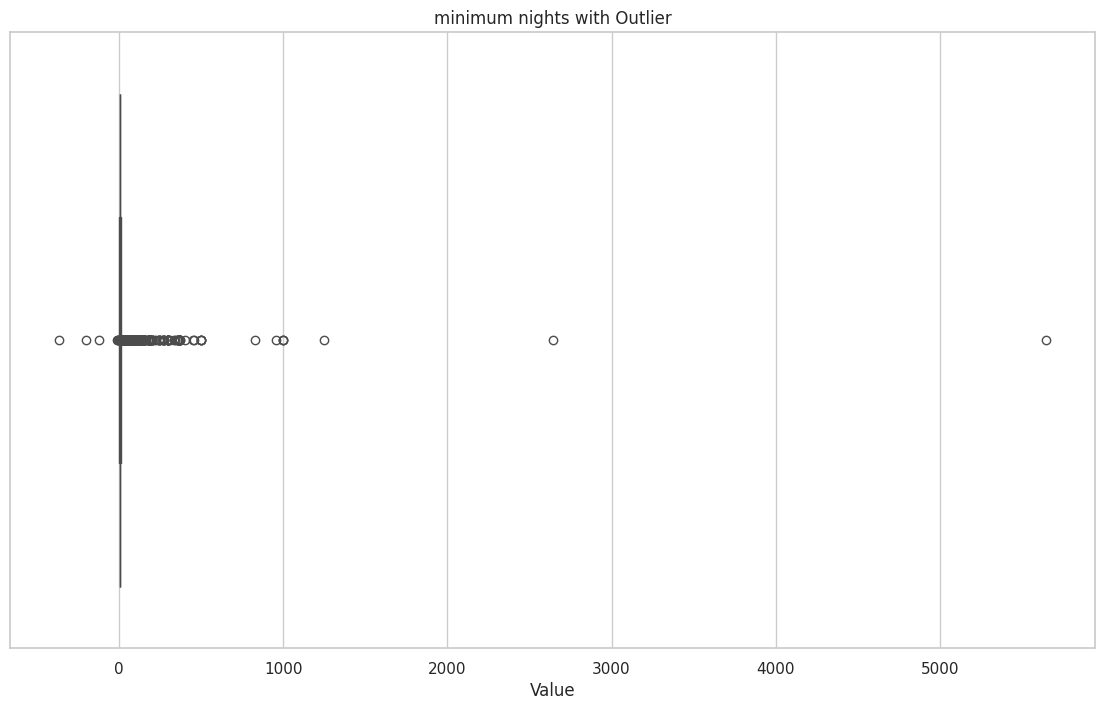

In [160]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["minimum nights"])
plt.title("minimum nights with Outlier")
plt.xlabel("Value")
plt.show()

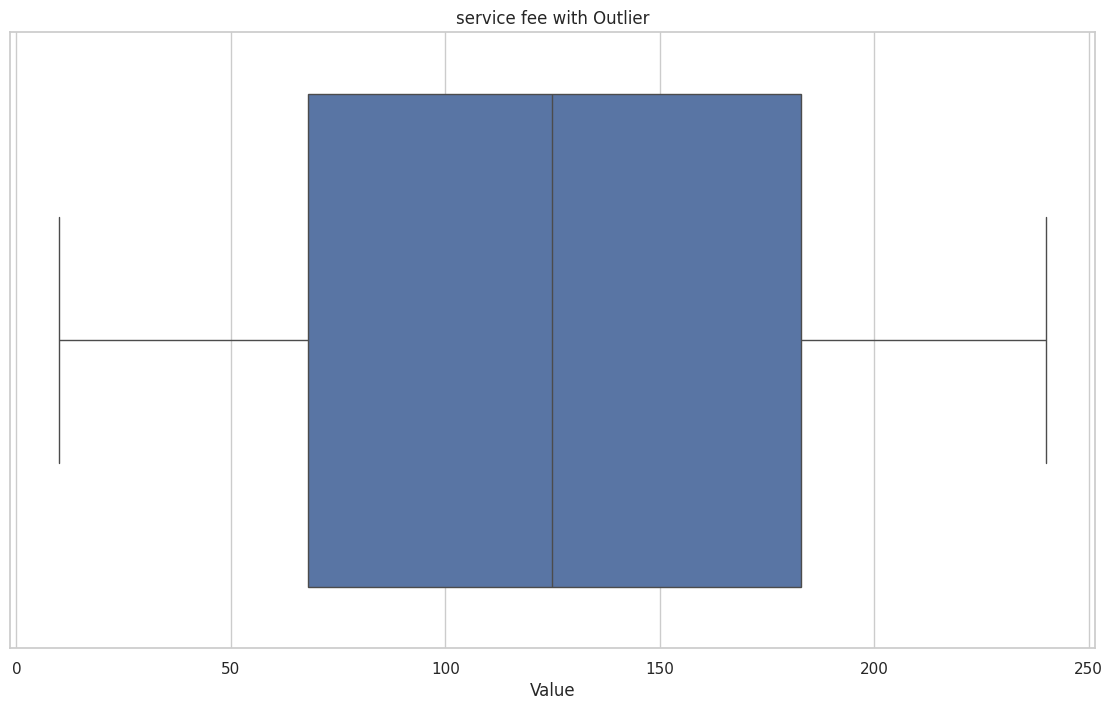

In [161]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["service fee_$"])
plt.title("service fee with Outlier")
plt.xlabel("Value")
plt.show()

In [162]:
# We found that, minimum nights and availability 365 column has outliers
# As minimum nights can change per hotel, lets remove outliers from availability 365 column
df.drop(df[df["availability 365"]>365].index,inplace=True)

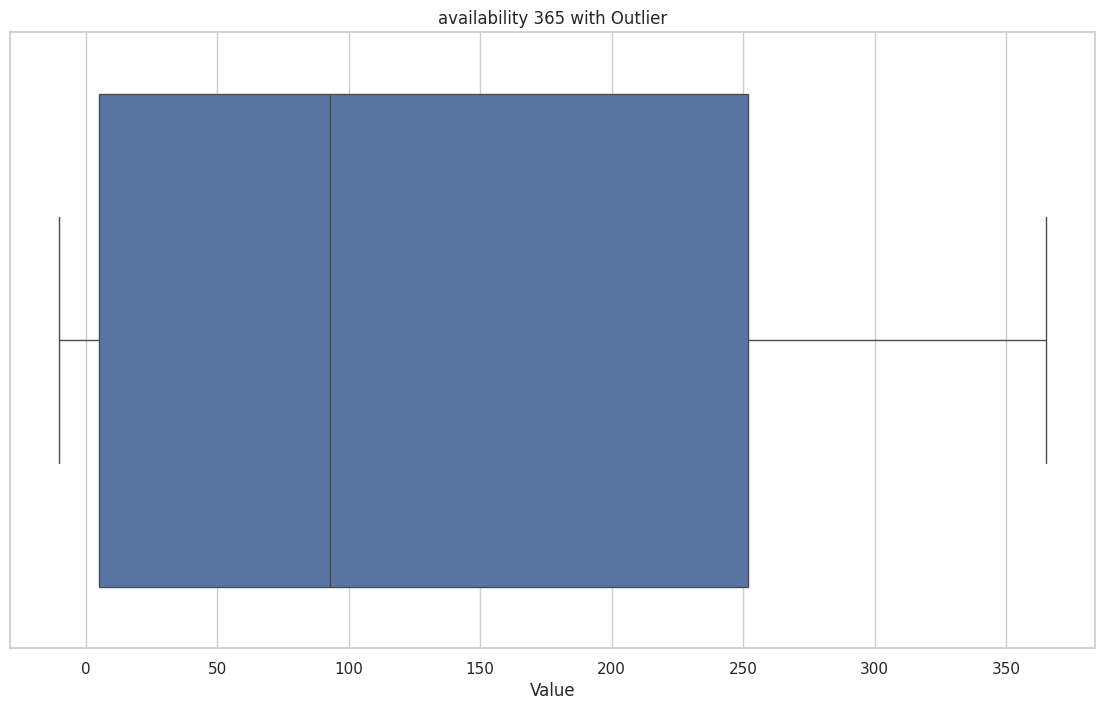

In [163]:
# Checking if outliers are removed or not

plt.figure(figsize=(14, 8))
sns.boxplot(x=df["availability 365"])
plt.title("availability 365 with Outlier")
plt.xlabel("Value")
plt.show()

In [164]:
# checking if data is correctly prepared or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81386 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81386 non-null  object        
 1   NAME                            81386 non-null  object        
 2   host id                         81386 non-null  object        
 3   host_identity_verified          81386 non-null  object        
 4   host name                       81386 non-null  object        
 5   neighbourhood group             81386 non-null  object        
 6   neighbourhood                   81386 non-null  object        
 7   lat                             81386 non-null  float64       
 8   long                            81386 non-null  float64       
 9   country                         81386 non-null  object        
 10  country code                    81386 non-null  object        
 11  instan

## **Exploratory Data Analysis**

In [165]:
df.describe()

,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81386.000000,81386.000000,81386.000000,81386.000000,81386.000000,81386.000000,81386.000000,81386,81386.000000,81386.000000,81386.000000,81386.000000
mean,40.727260,-73.948281,2012.489925,626.623694,125.325756,7.417897,32.055083,2019-06-20 21:01:12.454722048,1.390701,3.286044,7.102057,135.045499
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687610,-73.982067,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721240,-73.953615,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,93.000000
75%,40.762500,-73.930512,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,252.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2040-06-16 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056389,0.050608,5.756790,331.762095,66.355772,28.345462,51.694400,NaN,1.760595,1.278817,29.831321,128.430238


### **Question 1**: *What are diffrent types property rooms in dataset?*



In [166]:
df["room type"].value_counts().to_frame()

,count
room type,
Entire home/apt,42999
Private room,36665
Shared room,1614
Hotel room,108


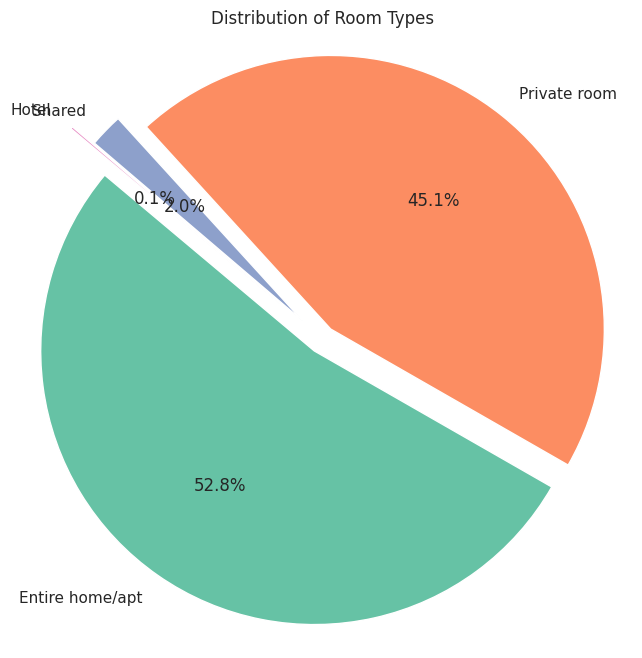

In [167]:


# Pie chart representation
room_counts = {
    'Entire home/apt': 42932,
    'Private room': 36609,
    'Shared': 1614,
    'Hotel': 108
}

# Pie chart
labels = room_counts.keys()
sizes = room_counts.values()
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
explode = (0.05, 0.05, 0.1, 0.2)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Room Types')
plt.axis('equal')
plt.show()

### **Answer 1**: From Data we can understand that most people try to book Entire Homes or Apt(Maybe Rich Clients) Orelse goes for private rooms (C Middle Class Clients).Where as very few clients books Hotels or shared rooms from AirBnB

### **Question 2**: *Which neibourhood group has hightest number of listing?*

In [168]:
df["neighbourhood group"].value_counts().to_frame()

,count
neighbourhood group,
Brooklyn,33782
Manhattan,33602
Queens,10953
Bronx,2243
Staten Island,806


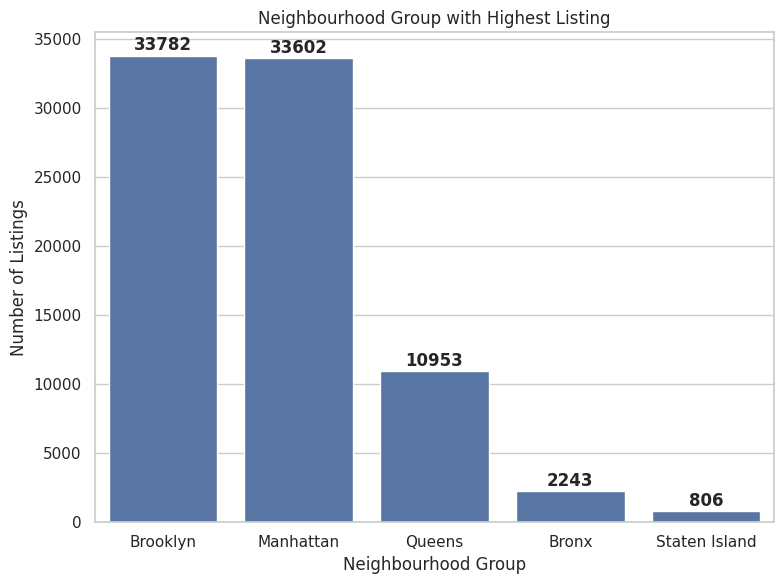

In [169]:
# Creating a bar graph for above data, neighbourhood group with highest listing
neighbourhood_counts = df["neighbourhood group"].value_counts()
x_labels = neighbourhood_counts.index
y_values = neighbourhood_counts.values

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x_labels, y=y_values)

# Add value labels on top of bars
for i, value in enumerate(y_values):
    ax.text(i, value + 100, str(value), ha='center', va='bottom', fontweight='bold')

plt.title("Neighbourhood Group with Highest Listing")
plt.ylabel("Number of Listings")
plt.xlabel("Neighbourhood Group")
plt.tight_layout()
plt.show()


### **Answer 2**: *While Brooklyn and Manhattan has highest numbers of listing (**~33.5 k**), Queens also have significant numbers of listings which is arround **11k** but Bronx and staten Island has very low listing's compared to other Neighbourhood Group*

### **Question 3**: *Which neibourhood group has highest average prices for AirBnB listing*?

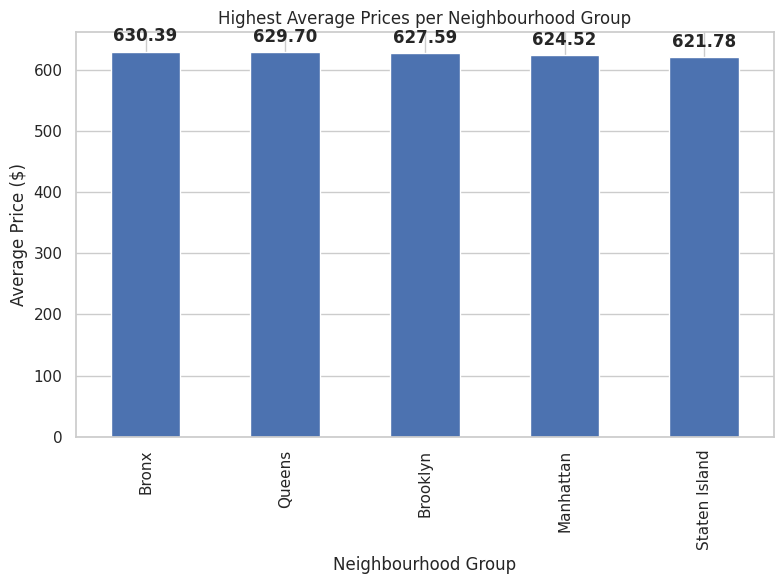

In [170]:
# highest average prices per neibourhood group-Bar graph
# Calculate average prices
Average_price = df.groupby("neighbourhood group")["price_$"].mean().sort_values(ascending=False).to_frame()

# Plot bar chart
ax = Average_price.plot(kind="bar", figsize=(8, 6), legend=False)

# Add value labels on top of bars
for i, value in enumerate(Average_price["price_$"]):
    ax.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title("Highest Average Prices per Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xlabel("Neighbourhood Group")
plt.tight_layout()
plt.show()

### **Answer 3**: Average Price of all neighbourhood Groups are almost same within 621 and 631 dollar range.

### *   Bronx has highest average listing price of 630.39$

### *   Staten Island with lowest 621.78 $ of average listing price

### **Question 4**:  *Is there any relationship between construction year of property and price?*

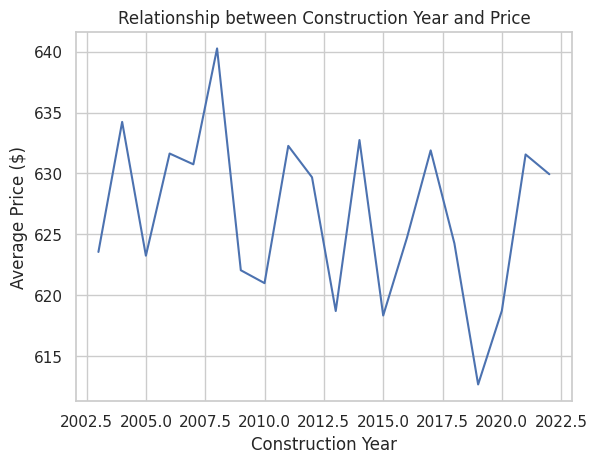

In [171]:
# relationship between column construction year and price column with line graph
df.groupby(df["Construction year"])["price_$"].mean().plot();
plt.xlabel("Construction Year")
plt.ylabel("Average Price ($)")
plt.title("Relationship between Construction Year and Price")
plt.show()

### **Answer 4**: This line graph shows Relationship between Construction Year and Price is very volatile across years.But the price from 2019-2021 increasely drastically. But from year 2022 and ahead the prices are dropping gradually

### **Question 5**: Which are 10 hosts by calculated host listing count ?

In [172]:
# Top 10 hosts by host listing count
top_10_hosts = df.groupby("host name")["calculated host listings count"].sum().sort_values(ascending=False).head(10).to_frame()
top_10_hosts

,calculated host listings count
host name,
Sonder (NYC),111921.0
Karen,42386.0
Jeniffer,31261.0
Blueground,21168.0
Kaz,17552.0
Corporate Housing,13468.0
Stay With Vibe,10260.0
Soya,10260.0
Justin,10038.0


/tmp/ipython-input-1964521371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_hosts.index, y=top_10_hosts["calculated host listings count"], palette="viridis")


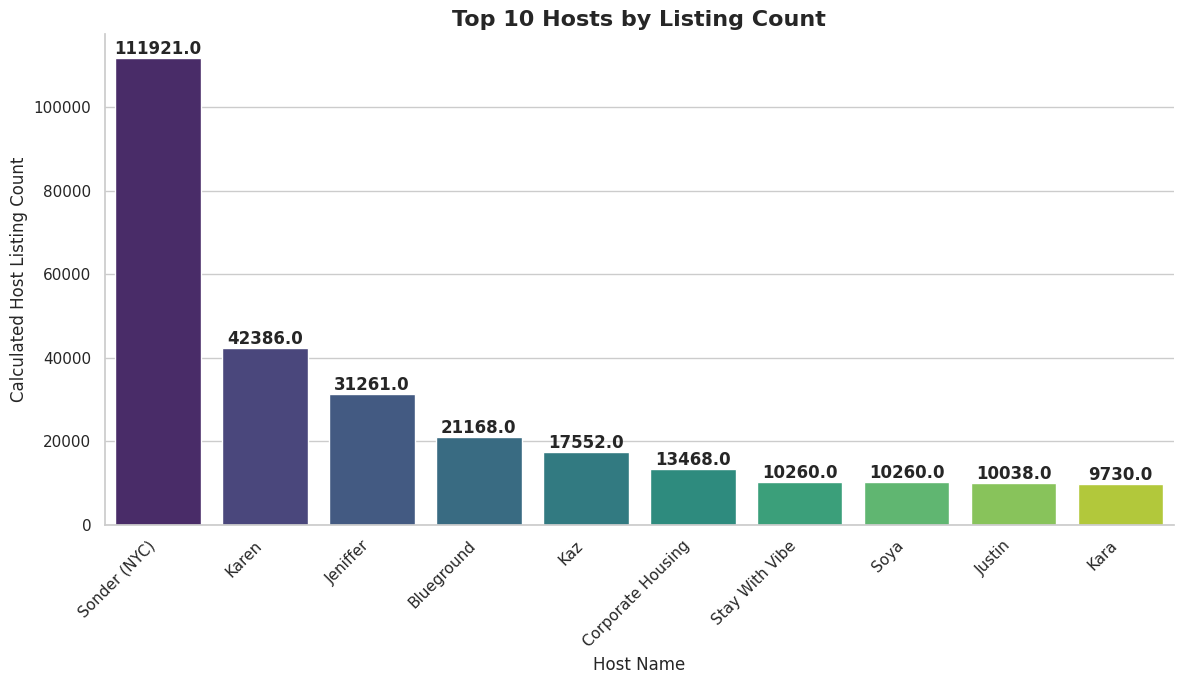

In [173]:
# Visualizations of top 10 countries by calculated host listing count

# Set the style for better aesthetics
sns.set(style="whitegrid")


plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_10_hosts.index, y=top_10_hosts["calculated host listings count"], palette="viridis")

# Add value labels on top of each bar
for i, value in enumerate(top_10_hosts["calculated host listings count"]):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

# Add titles and labels
plt.title("Top 10 Hosts by Listing Count", fontsize=16, fontweight='bold')
plt.xlabel("Host Name", fontsize=12)
plt.ylabel("Calculated Host Listing Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove top and right spines for cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### **Answer 5**: Top hosts by host listing count is Sonder(NYC) with 11192 listings, while Karen, Jenniffer are also good hosts whose count is above 30k.

### **Question 6**: Are hosts with verified identity have more chance of getting positive reviews?

In [174]:
# host_identity_verified grouped by mean of mean of review rate number
host_identity_verified_reviews = df.groupby("host_identity_verified")["review rate number"].mean().to_frame()
host_identity_verified_reviews


,review rate number
host_identity_verified,
unconfirmed,3.282541
verified,3.289549


/tmp/ipython-input-835544530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


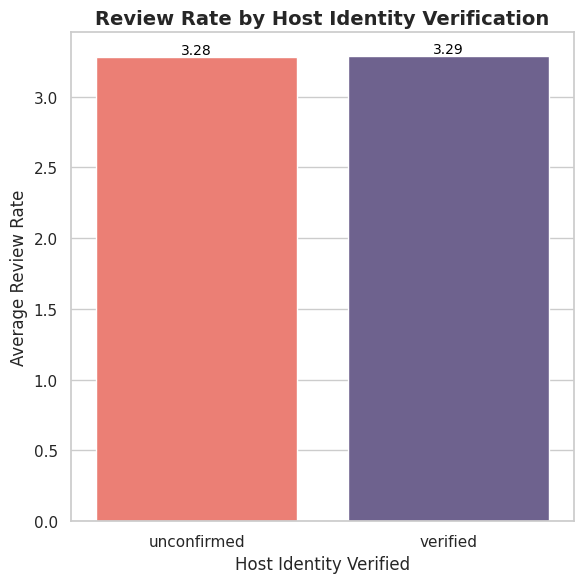

In [175]:
# plot a graph for unconfirmed and verified

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x=host_identity_verified_reviews.index,
    y=host_identity_verified_reviews["review rate number"],
    palette=["#FF6F61", "#6B5B95"]  # Custom colors for contrast
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

# Titles and labels
plt.title("Review Rate by Host Identity Verification", fontsize=14, fontweight='bold')
plt.xlabel("Host Identity Verified", fontsize=12)
plt.ylabel("Average Review Rate", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()




### **Answer 6**: No, There isnt much significant change in ratings in between verified and unconfirmed. The average rating of verified hosts(~ 3.29) are slightly more than unconformed hosts(~ 3.28)

### **Question 7**: Is there a correlation between the price of listing and its service fee?

In [176]:
# Correlation between column price_$ and service fee_$
df[["price_$","service fee_$"]].corr()

,price_$,service fee_$
price_$,1.000000,0.999991
service fee_$,0.999991,1.000000


Text(0, 0.5, 'Service Fee ($)')

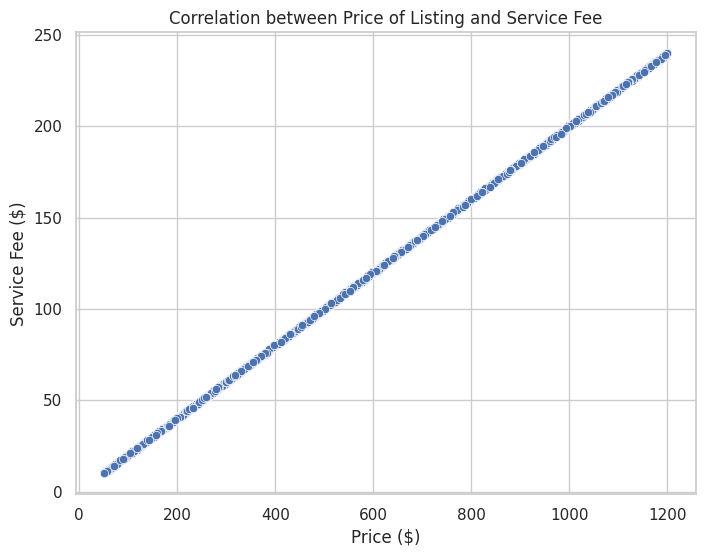

In [177]:
# Showing a scattar plot of correlation between column price_$ and service fee_$
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="price_$", y="service fee_$")
plt.title("Correlation between Price of Listing and Service Fee")
plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")

### **Answer 7**: There is high correlation between Service fee and price of listing. As price of listing increases so does service fee.

### **Question 8**: What is the average review rate number for listings, and does it vary based on the neighborhood group and room type?

In [178]:
# Average review rate is grouped by column calculated host listings count, neighborhood group and room type
average_review_rate = df.groupby(["neighbourhood group","room type"])["review rate number"].mean().to_frame()
average_review_rate

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.316847
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.250694
                    Hotel room                 3.833333
                    Private room               3.283638
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274100
                    Hotel room                 3.500000
                    Private room               3.293516
                    Shared room                3.269350
Queens              Entire home/apt            3.358564
                    Hotel room                 3.750000
                    Private room               3.317980
                    Shared room                3.326087
Staten Island       Entire home/apt            3.323671
                    Private room               3.490909
                    Shared room                3.714286

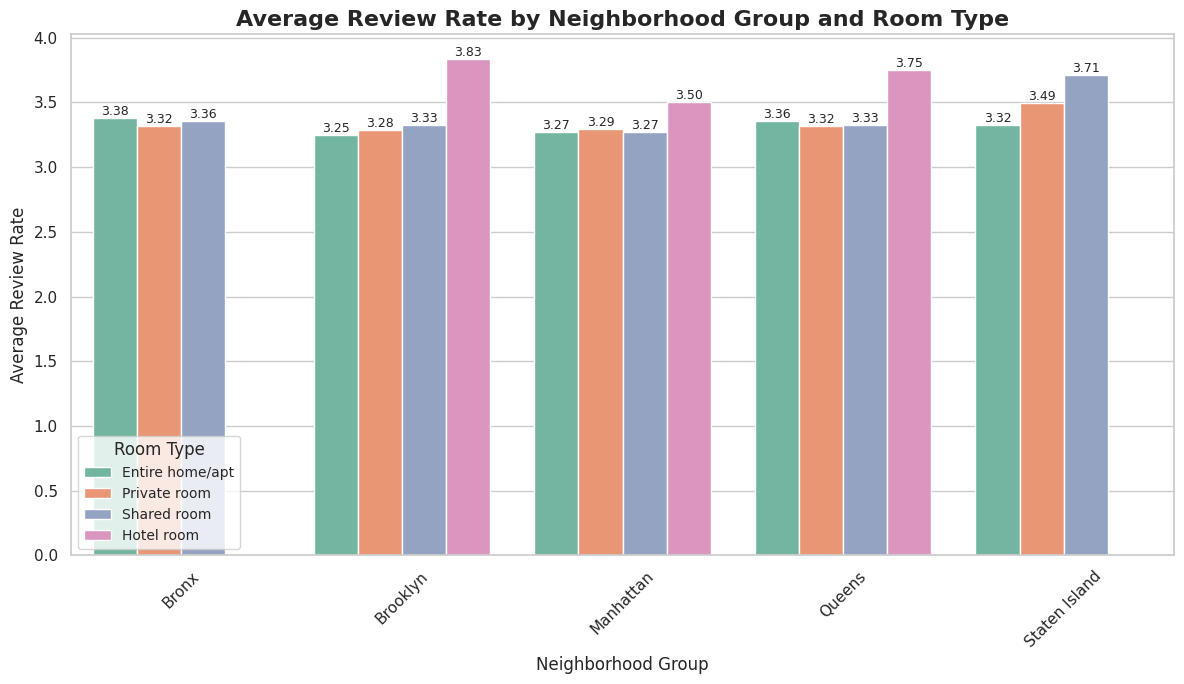

In [179]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Improved barplot
ax = sns.barplot(
    data=average_review_rate.reset_index(),
    x="neighbourhood group",
    y="review rate number",
    hue="room type",
    palette="Set2"
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

# Title and labels
plt.title("Average Review Rate by Neighborhood Group and Room Type", fontsize=16, weight='bold')
plt.xlabel("Neighborhood Group", fontsize=12)
plt.ylabel("Average Review Rate", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Room Type", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()


### **Answer 8**: Hotel rooms has higher average rating compared to other room types, These hotel rooms are available at Brooklyn, Manhattan and Queens

### **Question 9**: Are hosts with higher calculated host listing count more likely to maintain higher availability throughout the year ?

Text(0.5, 1.0, 'Relationship between Calculated Host Listing Count and Availability')

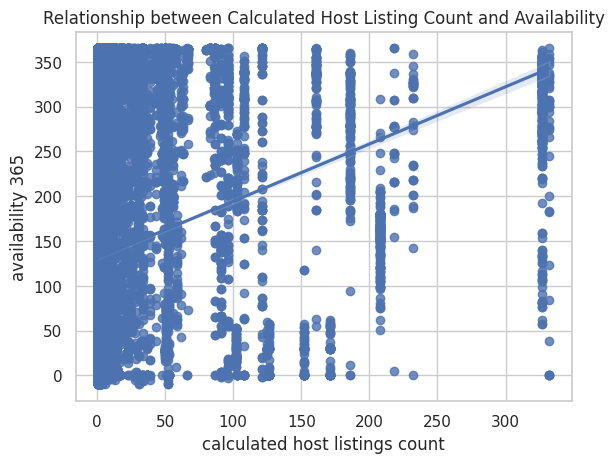

In [180]:
sns.regplot(df,x="calculated host listings count",y="availability 365")
plt.title("Relationship between Calculated Host Listing Count and Availability")

In [181]:
# Finding correlation between column calculated host listing count and availability 365
df[["calculated host listings count","availability 365"]].corr()

,calculated host listings count,availability 365
calculated host listings count,1.000000,0.148445
availability 365,0.148445,1.000000


### **Answer 9**: The correlation is 0.148 which is weak positive correlation, And from scattar plot there are expectations where even with low calculated host listing there are many hosts which are highly avaible (Maybe new hosts or small property holders)

### **Conclusions**: With help of Data Analysis after Preprocessing, Data Wrangling-

*   Removed Duplicates
*   Dropped Columns
*   Dropped Null values
*   Filtered Outliers
*   Corrected DataTypes of Columns
*   Corrected Spelling mistakes( classses of columns)

### EDA of AirBnb Dataset our keyfindings are:


*   High Demand for Private or Whole Home/apt properties rentings
*   Brooklyn and Manhattan has high number of listing
*   Listing price for all neibourhood group is almost same from-620 to 631 $
*   High Correlation between service fee and Price of listing
*   Hotel Room's users provides high average rating than other room types



